<a href="https://colab.research.google.com/github/SambhavRekhawat/test/blob/main/Implied_Volatility_and_Volatility_smile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Implied Volatility and Volatility Smirk

Implied volatility is a crucial concept in options pricing. It represents the market's forecast of the future volatility of the underlying asset over the life of the option contract.
Implied volatility is derived from an option pricing model (e.g., Black-Scholes) by using the current option price and other known variables, such as the underlying asset price, strike price, time to expiration, and risk-free rate. It is essentially the volatility level that, when plugged into the option pricing model, yields the observed market price of the option.



The relationship between implied volatility and option price is direct and positive. Higher implied volatility translates into higher option prices, as it increases the probability of the option finishing in-the-money at expiration. Conversely, lower implied volatility results in lower option prices.
The concept of implied volatility emerged in the early 1970s, shortly after the development of the Black-Scholes option pricing model in 1973. The Black-Scholes model requires an input for the expected future volatility of the underlying asset, which was initially set to the historical volatility.
However, traders quickly realized that the market prices of options often deviated from the theoretical prices calculated using historical volatility. They then started to infer the volatility level from the actual market prices of options, giving rise to the notion of implied volatility.

In [58]:
#Install and import the libraries necessary to run thee code
!pip install yfinance
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot  as plt

In [59]:
#create function that gets all option expiration and then loops through each expiration to get the option chain.
def option_chain(ticker):
  asset = yf.Ticker(ticker)
  expirations = asset.options
  chaains = pd.DataFrame()
  for expiration in expirations:
    #tuple of two dataframe
    opt = asset.option_chain(expiration)
    calls = opt.calls
    calls['optionType'] = "call"
    puts = opt.puts
    puts["OptionType"] = "put"
    chain = pd.concat([calls,puts])
    chain ['expiration'] = pd.to_datetime(expiration) + pd.Dataoffset(hours =23, minutes = 59, seconds = 59)
    chains = pd.concat([chais,chain])
  chains["daysToExpiration"]=(chains.expiration - dt.datetime.today()).dt.days + 1
  return chains

<Axes: title={'center': 'implied Volatility skew'}, xlabel='strike'>

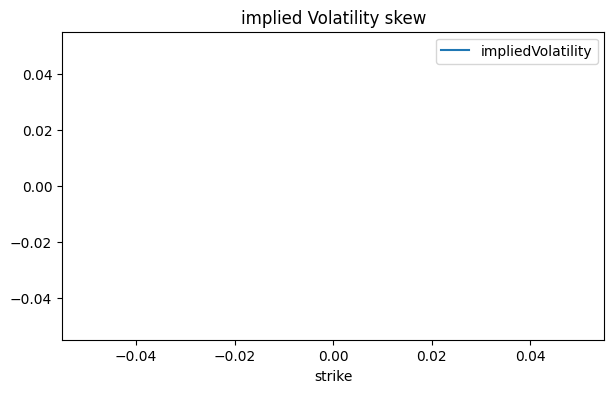

In [60]:
#download the data frame from a pandas dataframe for call option

options = option_chains("NVDA")
calls = options[options["optionType"]== "call"]
#Prints the expirations.
set(calls.expiration)
calls_at_expiry = calls[calls["expiration"] == "2024-06-07 23:59:59"]
filtered_calls_at_expiry = calls_at_expiry[calls_at_expiry.impliedVolatility >= 0.01]
filtered_calls_at_expiry[["strike","impliedVolatility"]].set_index("strike").plot(
    title = "implied Volatility skew", figsize=(7,4)
)

<Axes: title={'center': 'Implied Volatility Term Structure'}, xlabel='expiration'>

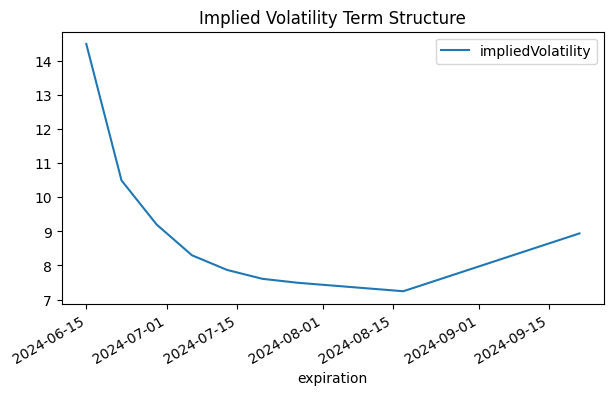

In [66]:
#plots the implied volatility term structure

calls_at_strike = options[options["strike"]== 1250.0]

filtered_calls_at_strike = calls_at_strike[calls_at_strike.impliedVolatility >= 0.001]
filtered_calls_at_strike[["expiration","impliedVolatility"]].set_index("expiration").plot(
    title = "Implied Volatility Term Structure", figsize = (7,4)
)

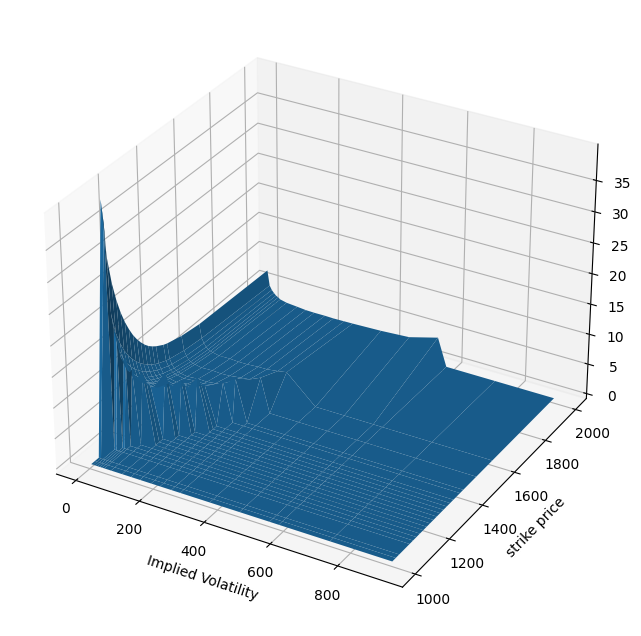

In [67]:
#plots  the implied Volatility surface

surface = (
    calls[['daysToExpiration', 'strike', 'impliedVolatility']]
    .pivot_table(values= 'impliedVolatility', index ='strike', columns='daysToExpiration')
    .dropna()
)

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection = '3d')

x, y, z = surface.columns.values , surface.index.values, surface.values
X, Y = np.meshgrid(x,y)

ax.set_xlabel('Days to expiartion')
ax.set_ylabel('strike price')
ax.set_xlabel('Implied Volatility')
ax.set_label('Call Implied volatility surface')

ax.plot_surface( X,Y, z)